# Lending Club Loan Approval System

## Business Background

> Add blockquote



Lending Club is a peer-to-peer lending company where individuals can borrow loans, and investors can fund those loans. Lending Club was founded in 2006 by Renaud Laplanche as a peer-to-peer (P2P) lending platform in San Francisco. It was one of the pioneers in the online lending space, where individual borrowers could obtain loans, and individual or institutional investors could invest in these loans to earn interest. The platform allowed for a more direct connection between lenders and borrowers, bypassing traditional banking intermediaries.

Read more here https://en.wikipedia.org/wiki/LendingClub

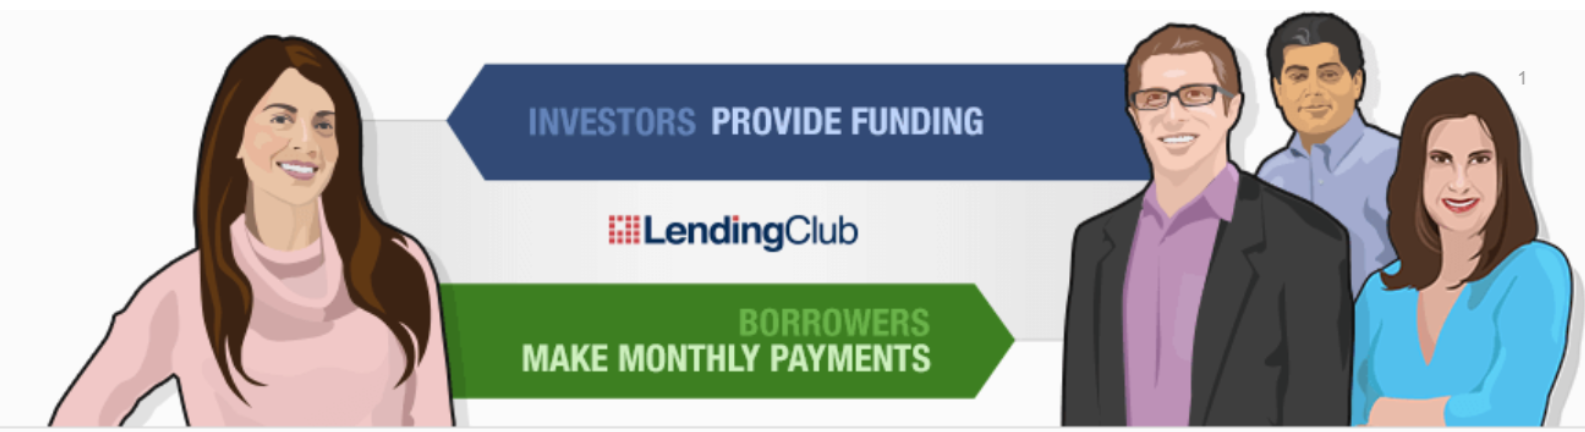

## Problem Statement

Now, whenever *Lending Club* approves a loan, there are two ways in which it is at risk:
- If LC approves a loan and the borrower fails to repay it on time
- If LC rejects a loan despite the borrower being capable of repaying the loan

Defaulting on loans can lead to significant financial losses for both the platform and investors. Similarly, not providing loans to credit-worthy customers can lead to missing out on potential revenue and profits. Therefore, a robust loan approval system is the need of the hour.

In the current loan approval process, underwriters evaluate loan applications by manually reviewing credit scores, income, debt, etc. and then, based on several parameters, either approve or reject a loan. This process is time-consuming and prone to errors.

Hence, Lending Club wants to build a loan approval system using Machine Learning models to automatically assess whether a given loan is likely to be repaid or whether the borrower is likely to default.

This is where you come in! As a budding data scientist, your goal is to help out Lending Club in creating this ML model that helps them predict whether a loan is likely to default or not.

## Data Understanding

You have been provided with around 38k loan application data from the Lending Club's website. The different columns and their description are mentioned below:

| Column Name         | Description                                                                                                                                                    |
|---------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                  | A unique LC assigned ID for the loan listing. *(Integer)*                                                                                                       |
| member_id           | A unique LC assigned ID for the borrower member. *(Integer)*                                                                                                    |
| loan_amnt           | The listed amount of the loan applied for by the borrower. If at some point the credit department reduces the loan amount, it will be reflected in this value. *(Float)* |
| term                | The number of payments on the loan. Values are in months and can be either 36 or 60. *(Integer)*                                                                 |
| int_rate            | Interest rate on the loan. *(Float)*                                                                                                                            |
| installment         | The monthly payment owed by the borrower if the loan originates. *(Float)*                                                                                       |
| grade               | LC assigned loan grade. *(Categorical/String)*                                                                                                                  |
| sub_grade           | LC assigned loan subgrade. *(Categorical/String)*                                                                                                               |
| emp_length          | Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years. *(Integer)*                   |
| home_ownership      | The home ownership status provided by the borrower during registration. Values are: RENT, OWN, MORTGAGE, OTHER. *(Categorical/String)*                           |
| annual_inc          | The self-reported annual income provided by the borrower during registration. *(Float)*                                                                         |
| verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified. *(Categorical/String)*                                               |
| purpose             | A category provided by the borrower for the loan request. *(Categorical/String)*                                                                                |
| dti                 | A ratio calculated using the borrower’s total monthly debt payments (excluding mortgage and the requested LC loan), divided by the borrower’s self-reported income. *(Float)* |
| delinq_2yrs         | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. *(Integer)*                                         |
| inq_last_6mths      | The number of inquiries in the past 6 months (excluding auto and mortgage inquiries). *(Integer)*                                                                |
| open_acc            | The number of open credit lines in the borrower's credit file. *(Integer)*                                                                                       |
| pub_rec             | Number of derogatory public records. *(Integer)*                                                                                                                |
| revol_bal           | Total credit revolving balance. *(Float)*                                                                                                                       |
| revol_util          | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. *(Float)*                             |
| total_acc           | The total number of credit lines currently in the borrower's credit file. *(Integer)*                                                                            |
| last_pymnt_amnt     | Last total payment amount received. *(Float)*                                                                                                                   |
| loan_status         | Current status of the loan. *(Categorical/String)*                                                                 
                  |

...

## Starter Code

### Necessary Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

### Data Loading

In [ ]:
## Load the dataset
df = pd.read_csv('/content/loans.csv')

In [ ]:
## Observe the first few rows
## Do you observe any issues?
df.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,1077501,1296599.0,5000.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7%,9.0,171.62,Fully Paid
1,1077430,1314167.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4%,4.0,119.66,Charged Off
2,1077175,1313524.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5%,10.0,649.91,Fully Paid
3,1076863,1277178.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21%,37.0,357.48,Fully Paid
4,1075269,1311441.0,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3%,12.0,161.03,Fully Paid


## Observations of first few rows:
  - id and member_id columns have unique values which dont provide much info towards the prediction, hence those columns can be dropped.
  - few columns like term, int_rate and emp_length need some data cleanup or data pre-processing which will be performed in the following steps.

In [ ]:
## Check the dataframe structure - datatypes and number of non-null rows
df.dtypes

,0
id,int64
member_id,float64
loan_amnt,float64
term,object
int_rate,object
installment,float64
grade,object
sub_grade,object
emp_length,object
home_ownership,object


In [ ]:
## Check the missing values across the columns
df.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,1036
home_ownership,0


In [ ]:
## Check the shape
df.shape

(38770, 23)

In [ ]:
## Check the percentage of missing values across the columns
df.isnull().sum()/len(df)*100

,0
id,0.000000
member_id,0.000000
loan_amnt,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000
emp_length,2.672169
home_ownership,0.000000


## Observations on null values:
      - emp_length: This feature have 1036 null values. Since only 2.67% of rows are null, this feature should not be dropped and need to be preprocessed in a better way to improve the model's predictive performance.
      - revol_util: This feature have 50 null values. Since only 0.13% of rows are null, and the missing value is minimal, the feature should not be removed but rather be preprocessed in a right way to obtain a better prediction result

### Data Cleaning

- Perform missing value treatment
- Remove extra symbols, characters, etc. from appropriate columns

In [ ]:
## Remove extra symbols, characters
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mode()[0])
df['term'] = df['term'].str.replace(' months', '')
df['int_rate'] = df['int_rate'].str.replace('%', '')

In [ ]:
## Write your code
df['emp_length'].fillna('Unknown', inplace=True)

In [ ]:
## Write your code
emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
    'Unknown': -1
}

df['emp_length_encoded'] = df['emp_length'].map(emp_length_mapping)

In [ ]:
df.drop(columns = ['emp_length'], inplace = True)

In [ ]:
df['revol_util'] = df['revol_util'].str.replace('%', '')

##### Dropping the unnecessary columns

- Columns which are not required for analysis - `id`, `member_id`
- Columns which are not available at the time of loan approval (Check the data dictionary and problem statement to understand this more) - `installment` and `last_pymnt_amnt`

In [ ]:
## Drop the above columns
df.drop(columns=['id', 'member_id','installment', 'last_pymnt_amnt'], inplace = True)

In [ ]:
## Check the dataframe again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38770 non-null  float64
 1   term                 38770 non-null  object 
 2   int_rate             38770 non-null  object 
 3   grade                38770 non-null  object 
 4   sub_grade            38770 non-null  object 
 5   home_ownership       38770 non-null  object 
 6   annual_inc           38770 non-null  float64
 7   verification_status  38770 non-null  object 
 8   purpose              38770 non-null  object 
 9   dti                  38770 non-null  float64
 10  delinq_2yrs          38770 non-null  float64
 11  inq_last_6mths       38770 non-null  float64
 12  open_acc             38770 non-null  float64
 13  pub_rec              38770 non-null  float64
 14  revol_bal            38770 non-null  float64
 15  revol_util           38770 non-null 

Perform any additional data preparation steps if needed

In [ ]:
## Write the code
df['term'] = df['term'].astype(int)
df['int_rate'] = df['int_rate'].astype(float)

In [ ]:
## Write the code
df['revol_util'] = df['revol_util'].astype(float)

### Exploratory Data Analysis

Let's understand the key drivers of loan default using EDA. This will form the preliminary analysis before we start with our machine learning model building part. We can understand the distributions of different variables, how they are related with loan default and so on.

#### Univariate Analysis

Perform univariate analysis on the following variables. Use visualizations and summary statistics wherever necessary. Document your overall observations as well
- `loan_status`
- `term`
- `grade`
- `purpose`
- `loan_amnt`
- `annual_inc`

*Note* - You can do additional analysis as well

<Axes: xlabel='loan_status'>

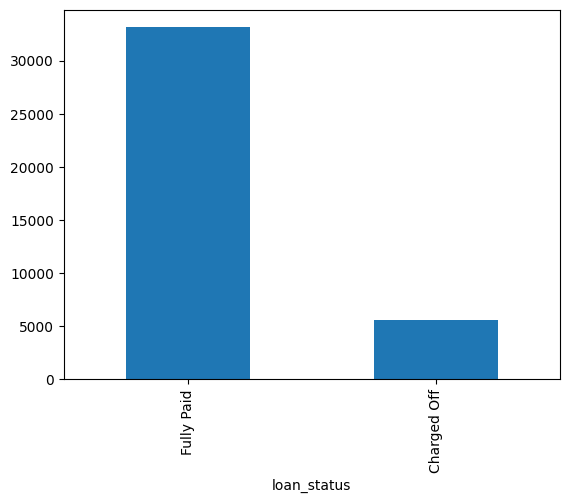

In [ ]:
## Write Code here
df['loan_status'].value_counts().plot.bar()

<Axes: xlabel='grade'>

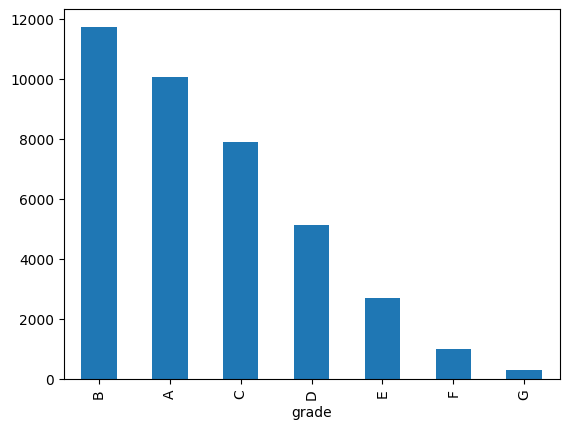

In [ ]:
df['grade'].value_counts().plot.bar()

(array([3.8722e+04, 4.0000e+01, 4.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([4.0000e+03, 6.0360e+05, 1.2032e+06, 1.8028e+06, 2.4024e+06,
        3.0020e+06, 3.6016e+06, 4.2012e+06, 4.8008e+06, 5.4004e+06,
        6.0000e+06]),
 <BarContainer object of 10 artists>)

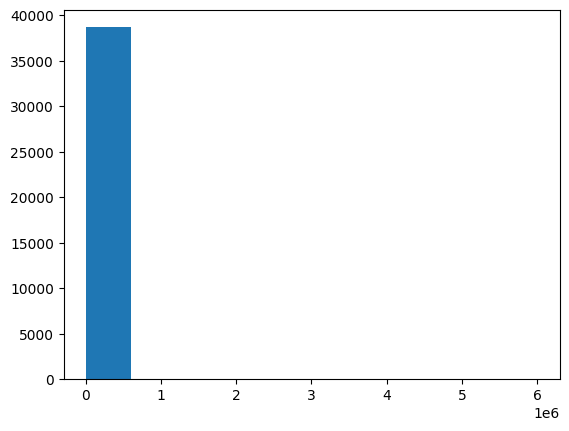

In [ ]:
plt.hist(df['annual_inc'])

(array([29096.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9674.]),
 array([36. , 38.4, 40.8, 43.2, 45.6, 48. , 50.4, 52.8, 55.2, 57.6, 60. ]),
 <BarContainer object of 10 artists>)

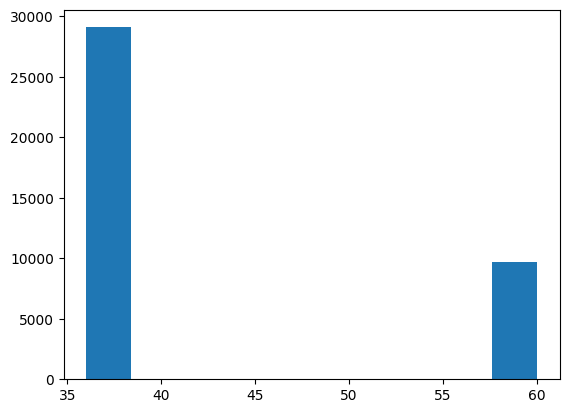

In [ ]:
## Write Code here
plt.hist(df['term'])

<Axes: xlabel='emp_length_encoded'>

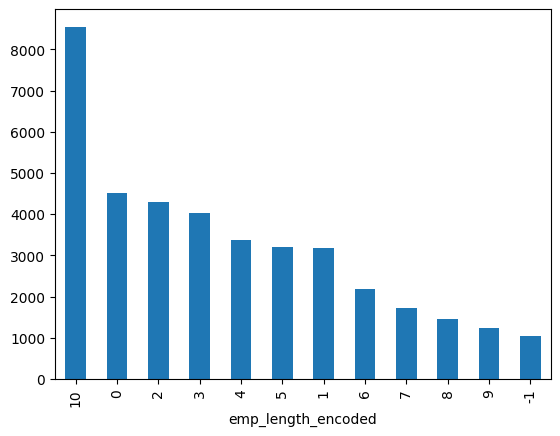

In [ ]:
## Write Code here
df['emp_length_encoded'].value_counts().plot.bar()

<Axes: xlabel='purpose'>

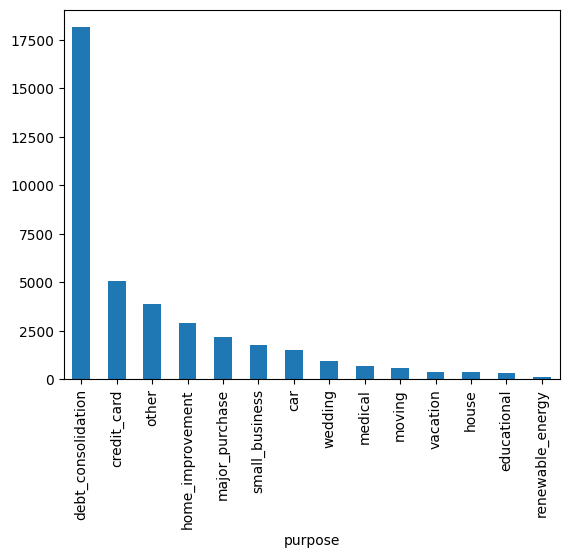

In [ ]:
df['purpose'].value_counts().plot.bar()

## Observations on the Univariate Analysis

    - loan_status: The target variable is 'loan_status' and it looks more imbalanced data set which needs to be balanced either using SMOTE or other techniques
    - grade: Most grades assigned by the Lending Club is Grade 'B'
    - term: The term feature have only 2 values - 36 and 60, most loans are 36 months means more borrowers prefer shorter term loan period
    - emp_length_encoded: Most borrowers have employment length of 10 years and only few borrowers have -1 on their employment length
    - purpose: The most loans are given to 'debt_consolidation' category

#### Bivariate Analysis

For the bivariate analysis, you can perform multiple analysis such as follows:

- How the default rate varies across the different variables
- Correlation Matrix
- etc.

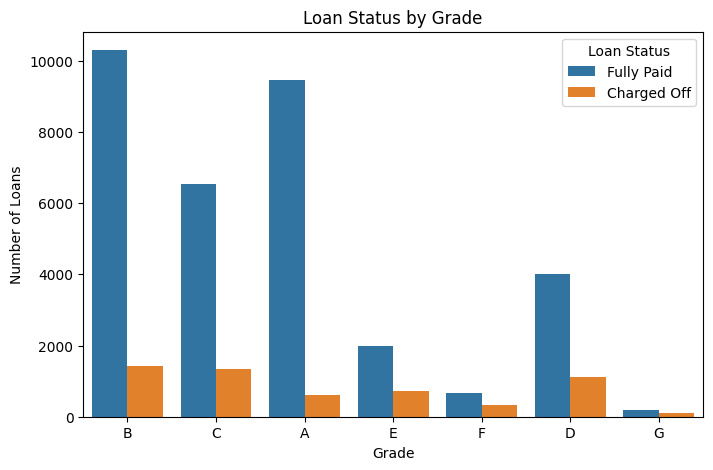

In [ ]:
#Write your code here
#Bivariate Analysis between 'loan_status' target variable and 'grade' feature
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='grade', hue='loan_status')
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status')
plt.show()

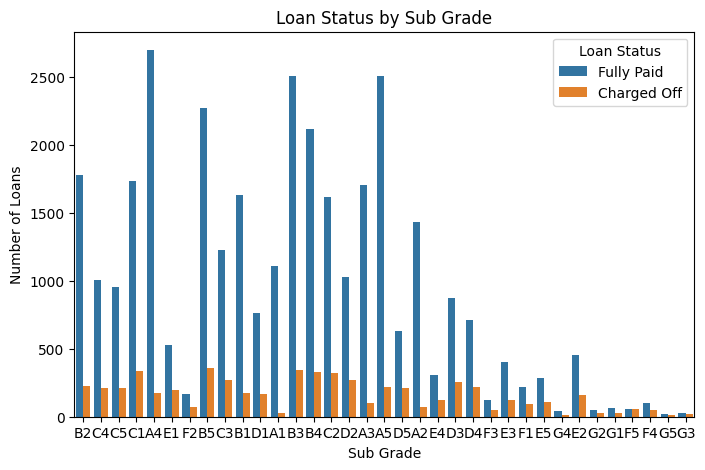

In [ ]:
#Write your code here
#Bivariate Analysis between 'loan_status' target variable and 'sub_grade' feature
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sub_grade', hue='loan_status')
plt.title('Loan Status by Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status')
plt.show()

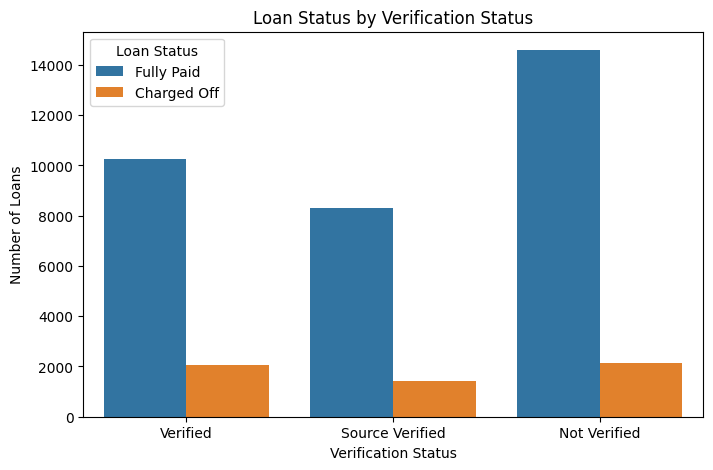

In [ ]:
#Write your code here
#Bivariate Analysis between 'loan_status' target variable and 'verification_status' feature
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='verification_status', hue='loan_status')
plt.title('Loan Status by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status')
plt.show()

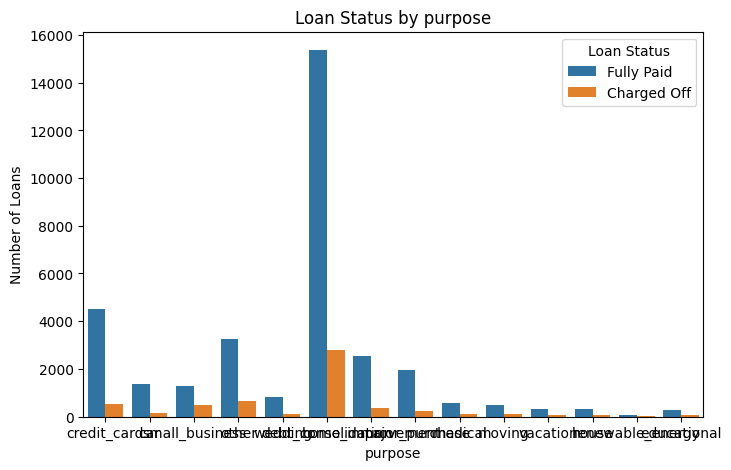

In [ ]:
#Write your code here
#Bivariate Analysis between 'loan_status' target variable and 'purpose' feature
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='purpose', hue='loan_status')
plt.title('Loan Status by purpose')
plt.xlabel('purpose')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status')
plt.show()

## Observations on the Bivariate Analysis
 - Most of the 'B' grade categorized loans are fully paid off
 - 'sub_grade' feature is derived form the 'grade', hence they have much collinearity between each other and so either one feature can be dropped.
 - Most of not_verified status are fully paid off on loans

**MultiVariate Analysis - Correlation Matrix - Heat Map**

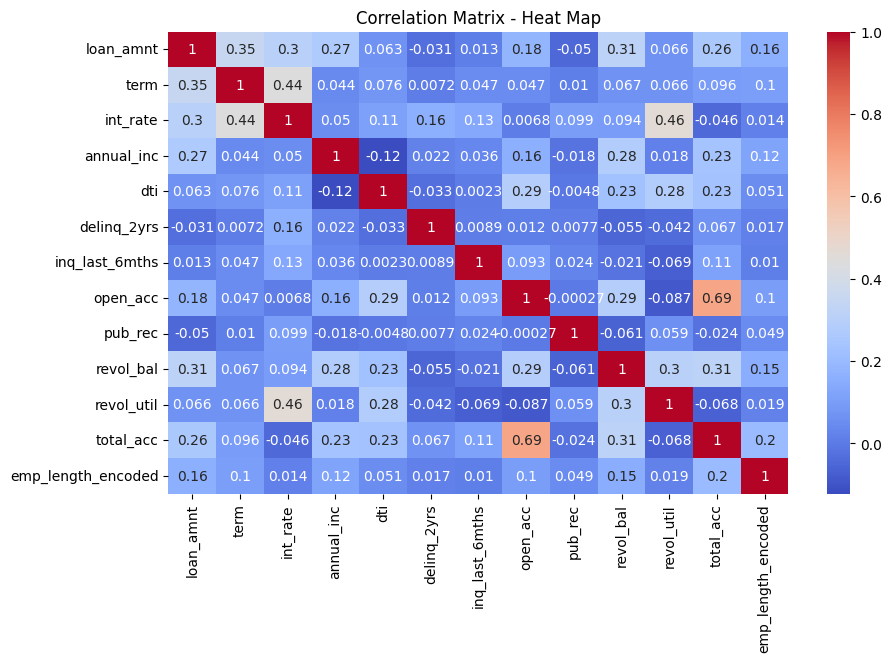

In [ ]:
# Correlation matrix - Heat Map
plt.figure(figsize=(10, 6))

# Select only numerical columns for correlation matrix
numerical_cols = df.select_dtypes(include=[np.number])
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Heat Map')
plt.show()

### Observations on the HeatMap Multivariate Analysis
  - total_acc and open_acc are highly corelated with 0.69, hence any one feature can be dropped.
  

In [ ]:
#Finding which feature (total_acc and open_acc) is better to drop

In [ ]:
#Convert to binary target
df= df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

df['loan_status'] = df['loan_status'].map({
    'Fully Paid': 0,
    'Charged Off': 1
})

In [ ]:
df[['open_acc', 'total_acc', 'loan_status']].corr()

,open_acc,total_acc,loan_status
open_acc,1.000000,0.687216,-0.009428
total_acc,0.687216,1.000000,-0.022705
loan_status,-0.009428,-0.022705,1.000000


The feature 'total_acc' is more correlated to the target variable 'loan_status' than the feature 'open_acc', hence its safe to drop the feature 'open_acc'

In [ ]:
df.drop(columns=['open_acc'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38770 non-null  float64
 1   term                 38770 non-null  int64  
 2   int_rate             38770 non-null  float64
 3   grade                38770 non-null  object 
 4   sub_grade            38770 non-null  object 
 5   home_ownership       38770 non-null  object 
 6   annual_inc           38770 non-null  float64
 7   verification_status  38770 non-null  object 
 8   purpose              38770 non-null  object 
 9   dti                  38770 non-null  float64
 10  delinq_2yrs          38770 non-null  float64
 11  inq_last_6mths       38770 non-null  float64
 12  pub_rec              38770 non-null  float64
 13  revol_bal            38770 non-null  float64
 14  revol_util           38770 non-null  float64
 15  total_acc            38770 non-null 

#### Pre-ML Data Pre-Processing

Before building the machine learning model, we shall perform
- encoding on all the categorical variables
- train-test split
- handle class imbalance
- scaling

##### Encoding variables

In [ ]:
# Write code here
#get a copy of the dataset
df_copy = df.copy()

In [ ]:
# Write code here
from sklearn.model_selection import train_test_split

X = df_copy.drop('loan_status', axis=1)
y = df_copy['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
df_encoded = pd.get_dummies(df_copy, columns=['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose'], drop_first=True)


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 72 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38770 non-null  float64
 1   term                                 38770 non-null  int64  
 2   int_rate                             38770 non-null  float64
 3   annual_inc                           38770 non-null  float64
 4   dti                                  38770 non-null  float64
 5   delinq_2yrs                          38770 non-null  float64
 6   inq_last_6mths                       38770 non-null  float64
 7   pub_rec                              38770 non-null  float64
 8   revol_bal                            38770 non-null  float64
 9   revol_util                           38770 non-null  float64
 10  total_acc                            38770 non-null  float64
 11  loan_status                 

In [ ]:
df_encoded.isna().sum()


,0
loan_amnt,0
term,0
int_rate,0
annual_inc,0
dti,0
...,...
purpose_other,0
purpose_renewable_energy,0
purpose_small_business,0
purpose_vacation,0


In [ ]:
from imblearn.over_sampling import SMOTE

# One-hot encode categorical columns
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


# Now SMOTE will work
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
## Write code
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: loan_status
0    26509
1     4507
Name: count, dtype: int64
After SMOTE: loan_status
0    26509
1    26509
Name: count, dtype: int64


**Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Write code for MinMax Scaler

scaler = MinMaxScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

### Model Building and Model Evaluation

- Your task is to build at least 3 models and evaluate their performance
- Start with a baseline model such as logistic regression
- Build additional models like decision trees, random forests, XGboost, etc.
- Make sure you're checking for overfitting and underfitting
- Use cross-validation and hyperparamater tuning to fit the best models
- Evaluate each of the model using metrics such as accuracy, precision, recall, ROC-AUC score, etc.
- Select the best possible model that you will be using for classfication

Let's start off with the simplest model - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
## Build the model
## Check its evaluation metrics

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_res_scaled, y_train_res)
y_pred_lr = log_reg.predict(X_test_scaled)

In [ ]:
## Build the model
## Check its evaluation metrics
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res_scaled, y_train_res)
y_pred_rf = rf.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.3f}")
    #print(f"Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.3f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.3f}")
    print(f"AUC:       {roc_auc_score(y_true, y_pred):.3f}")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Logistic Regression Performance:
Accuracy:  0.853
Recall:    0.017
F1 Score:  0.032
AUC:       0.506
Confusion Matrix:
 [[6598   29]
 [1108   19]]

Random Forest Performance:
Accuracy:  0.846
Recall:    0.046
F1 Score:  0.080
AUC:       0.514
Confusion Matrix:
 [[6508  119]
 [1075   52]]


### Observations on the models using Logistics regression and Random Forest

  The accuracy on both Logistic regression and Random Forest is around 85%. While comparing the Recall the logistic regression have very low of 0.017 but Random Forest have a recall of 0.046 which is slightly better. But overall both the models can perform much better.
  The AUC for Logistic Regression is 0.506 whereas for Random Forest its 0.514.

In [ ]:
## Build the model
## Check its evaluation metrics

log_reg = LogisticRegression(class_weight='balanced',C=0.1, solver='liblinear', max_iter=1000, random_state=42)

log_reg.fit(X_train_res_scaled, y_train_res)
y_pred_lr = log_reg.predict(X_test_scaled)

evaluate_model(y_test, y_pred_lr, "Logistic Regression2")


Logistic Regression2 Performance:
Accuracy:  0.853
Recall:    0.019
F1 Score:  0.035
AUC:       0.507
Confusion Matrix:
 [[6591   36]
 [1106   21]]


##Observation while using class_weight='balanced'
 The Recall improved to 0.019 from 0.017 after adding class_weight='balanced' to the Logistic Regression
 The AUC just increased from 0.506 to 0.507 where there is not much change observed.


In [ ]:
## Build the model using XGBoost
## Check its evaluation metrics
from xgboost import XGBClassifier

# create model instance
bst = xgb_model = XGBClassifier(
    n_estimators=300,          # number of trees
    learning_rate=0.05,        # step size shrinkage
    max_depth=5,               # depth of each tree
    subsample=0.8,             # random sampling of rows
    colsample_bytree=0.8,      # random sampling of columns per tree
    scale_pos_weight= (len(y_train_res[y_train_res==0]) / len(y_train_res[y_train_res==1])),  # handle imbalance
    random_state=42,
    use_label_encoder=False,
    eval_metric='auc'          # avoid warnings, use AUC as metric
)
# fit model
bst.fit(X_train_res_scaled, y_train_res)
# make predictions
y_pred_xgb = bst.predict(X_test_scaled)
y_pred_proba = bst.predict_proba(X_test_scaled)[:, 1]
evaluate_model(y_test, y_pred_xgb, "XGBoost1 Results")
#evaluate_model(y_test, y_pred_proba, "XGBoost2 Results")


XGBoost1 Results Performance:
Accuracy:  0.853
Recall:    0.030
F1 Score:  0.056
AUC:       0.512
Confusion Matrix:
 [[6582   45]
 [1093   34]]


###Observations on the XGBoost Model:
 Recall is 0.030 which also relatively low as its capturing only 3% of the loan defaults

 Confusion Matrix	1093 false negatives (missed positives) vs. 34 true positives — confirms model is under-detecting defaults.

 AUC is 0.512 which is not much difference from the previous models

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

rf_grid = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=5,
    scoring='roc_auc',
    cv=2,
    random_state=42,
    n_jobs=-1
)

rf_grid.fit(X_train_res, y_train_res)
print("Best Params:", rf_grid.best_params_)
print("Best AUC:", rf_grid.best_score_)

Best Params: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
Best AUC: 0.9501341858065296


## Observations on RandomizedSearchCV
  - The AUC of 0.95 is the better value than all previous values which displays that the model performs very well in this case.  

In [ ]:
##Build Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
param_dist = {
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}
dt_random = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

dt_random.fit(X_train_res_scaled, y_train_res)
print("Best Parameters:", dt_random.best_params_)
print("Best CV AUC:", dt_random.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_depth': 25, 'criterion': 'entropy'}
Best CV AUC: 0.9115251058614104


In [ ]:
best_dt = dt_random.best_estimator_
y_pred_dt = best_dt.predict(X_test_scaled)
y_pred_proba_dt = best_dt.predict_proba(X_test_scaled)[:, 1]

print("AUC (Test):", roc_auc_score(y_test, y_pred_proba_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

AUC (Test): 0.6136580087188694

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6627
           1       0.23      0.09      0.13      1127

    accuracy                           0.82      7754
   macro avg       0.55      0.52      0.52      7754
weighted avg       0.77      0.82      0.79      7754


Confusion Matrix:
[[6285  342]
 [1024  103]]


In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_dt)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_thresh = thresholds[np.argmax(f1_scores)]
print(f"Best Threshold: {best_thresh:.3f}")

y_pred_opt_dt = (y_pred_proba_dt >= best_thresh).astype(int)
print("\nClassification Report (Optimal Threshold):")
print(classification_report(y_test, y_pred_opt_dt))

Best Threshold: 0.167

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

           0       0.89      0.61      0.72      6627
           1       0.20      0.57      0.29      1127

    accuracy                           0.60      7754
   macro avg       0.55      0.59      0.51      7754
weighted avg       0.79      0.60      0.66      7754



## Observations on Decision Tree Model
 - Recall for class 1 is 0.57 and for class 0 is 0.60 which is far better than the previous models. This models misses less loan defaults than in other models